# HOST ANALYSIS OF AIRBNB DATASET(SEATTLE)

The first task was to analyze what was the year, which welcomed most hosts.

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The fist step was to import listing.csv inot a dataframe.

In [3]:
listings = pd.read_csv(r"C:\Users\kamat\Downloads\seattle\listings.csv",)

In [5]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


The data is very large, becomes necessary to understand the number of features it presents

In [24]:
listings.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

Shows that the there are 92 features, we don't need all,"Host_since" is a feature which seems to be an important element in this case study.

In [25]:
join_dates = pd.to_datetime(listings['host_since']).value_counts().resample('D').mean().fillna(0)

The graph is plotted to understand which year showed highest host sign ups. The .to_datetime function of pandas is used, and a count is made over each day per year.The plot shows that the year 2013 showed a very large number of hosts signing up


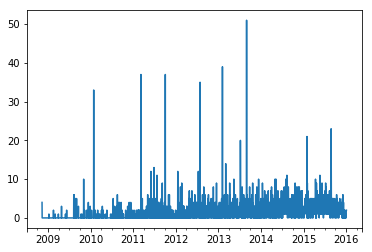

In [22]:
join_dates.plot()

To find the particular day, which showed highest number of hosts signing up, find the Mode(gives the highest count for the date)

In [27]:
np.argmax(join_dates)

C:\Users\kamat\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:51: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


Timestamp('2013-08-30 00:00:00', freq='D')

An attempt was made to search what event triggered this spike, no relevant domain specific information was found.So an attempt was made 

In [71]:
'''import bs4
from bs4 import BeautifulSoup as soup
from urllib.request import urlopen

news_url="https://news.google.com/news/rss"
Client=urlopen(news_url)
xml_page=Client.read()
Client.close()

soup_page=soup(xml_page,"xml")
news_list=soup_page.findAll("item")
# Print news title, url and publish date
for news in news_list:
  print(news.title.text)
  print(news.link.text)
  #print(news.pubDate.text)
  print("-"*60)
  '''

'import bs4\nfrom bs4 import BeautifulSoup as soup\nfrom urllib.request import urlopen\n\nnews_url="https://news.google.com/news/rss"\nClient=urlopen(news_url)\nxml_page=Client.read()\nClient.close()\n\nsoup_page=soup(xml_page,"xml")\nnews_list=soup_page.findAll("item")\n# Print news title, url and publish date\nfor news in news_list:\n  print(news.title.text)\n  print(news.link.text)\n  #print(news.pubDate.text)\n  print("-"*60)\n  '

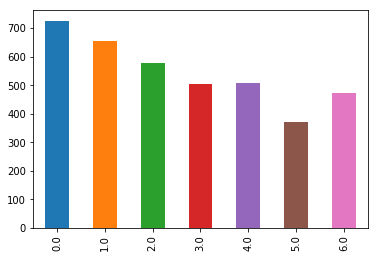

In [69]:
pd.to_datetime(listings['host_since']).dt.dayofweek.value_counts().sort_index().plot(kind='bar')